**PREDICCIÓN DE RESEÑAS EN RESTAURANTES**

La empresa está desarrollando una aplicación a modo TripAdvisor en la que los usuarios van a poder valorar una serie de restaurantes en base a su experiencia. Para que los restaurantes se adieran a la aplicación y quieran compartirla con sus clientes, estos desean saber, en base a sus características, que valoración pueden tener. Para ayudarles, hay que tratar de predecir la valoración (variable rate) que obtendría cada restaurante en base a las variables conocidas

La empresa solicita el siguiente informe:

Ver el número de restaurantes por cada una de las localizaciones.

Conocer el número de restaurantes que permiten y no permiten pedidos online y aquellos que permiten reservar mesa.

Queremos conocer, mediante una visualización, cual es la distribución de la valoracion de los usuarios en función de si el restaurante permite o no pedidos online.

Queremos conocer, mediante una visualización, cual es la distribución de la valoracion de los usuarios en función de si el restaurante permite o no reservar mesa.

¿Cual de las dos variables analizadas crees que sería más determinante de cara a un modelo de Machine Learning? ¿Por qué?

Realizar las transformaciones necesarias en las variables, de cara a crear un modelo de regresión que sea capaz de predecir la valoración de los usuarios.

Aplicar un modelo de Regresión para tratar de predecir la valoración de los usuarios. Tratar de mejorar los resultados aplicando otros modelos.

Seleccionar el mejor modelo basándote en la métrica del RMSE.

In [1]:
#Importamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('app_restaurantes_clean.csv')

In [3]:
df.head()

,Unnamed: 0,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [4]:
#Aquí vemos las distintas variables de nuestro DataFrame:

#name: Nombre del restaurante.

#online_order:¿Aceptan pedidos en línea? (Verdadero/Falso)

#book_table: ¿Podemos reservar mesa en el restaurante?

#rate: Valoración que dan los usuarios en la aplicación (variable objetivo).

#votes: Número de valoraciones realizadas a un restaurante.

#location: Ubicación del restaurante.

#rest_type: Tipo de restaurante.

#cuisines: Tipo de cocina.

#Cost2plate: Coste aproximado de dos platos.

#Type: Categoría del restaurante.

In [5]:
df.describe()

,Unnamed: 0,votes,Cost2plate
count,51717.000000,51717.000000,51371.000000
mean,25858.000000,283.697527,555.431566
std,14929.556273,803.838853,438.850728
min,0.000000,0.000000,40.000000
25%,12929.000000,7.000000,300.000000
50%,25858.000000,41.000000,400.000000
75%,38787.000000,198.000000,650.000000
max,51716.000000,16832.000000,6000.000000


In [6]:
#Vemos los valores nan
df.isna().sum()

,0
Unnamed: 0,0
name,0
online_order,0
book_table,0
rate,10052
votes,0
location,21
rest_type,227
cuisines,45
Cost2plate,346


In [7]:
#Vamos a ver que contiene la columna rate que es la que más nulos contiene
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
#Rellenamos los valores NaN con la moda de la columna
df["rate"] = df["rate"].fillna(df["rate"].mode()[0])

In [9]:
#Comprobamos que nos ha quedado limpio
df.isna().mean()

,0
Unnamed: 0,0.000000
name,0.000000
online_order,0.000000
book_table,0.000000
rate,0.000000
votes,0.000000
location,0.000406
rest_type,0.004389
cuisines,0.000870
Cost2plate,0.006690


In [10]:
#Ahora que tenemos muy pocos nan vamos a usar el metodo dropna para limpiar lo que queda
df.dropna(inplace = True)

In [11]:
#Comprobamos
df.isna().mean()

,0
Unnamed: 0,0.0
name,0.0
online_order,0.0
book_table,0.0
rate,0.0
votes,0.0
location,0.0
rest_type,0.0
cuisines,0.0
Cost2plate,0.0


In [12]:
#Eliminamos la columna unnamed ya que no nos proporciona información
df.drop('Unnamed: 0', axis = 1, inplace = True)

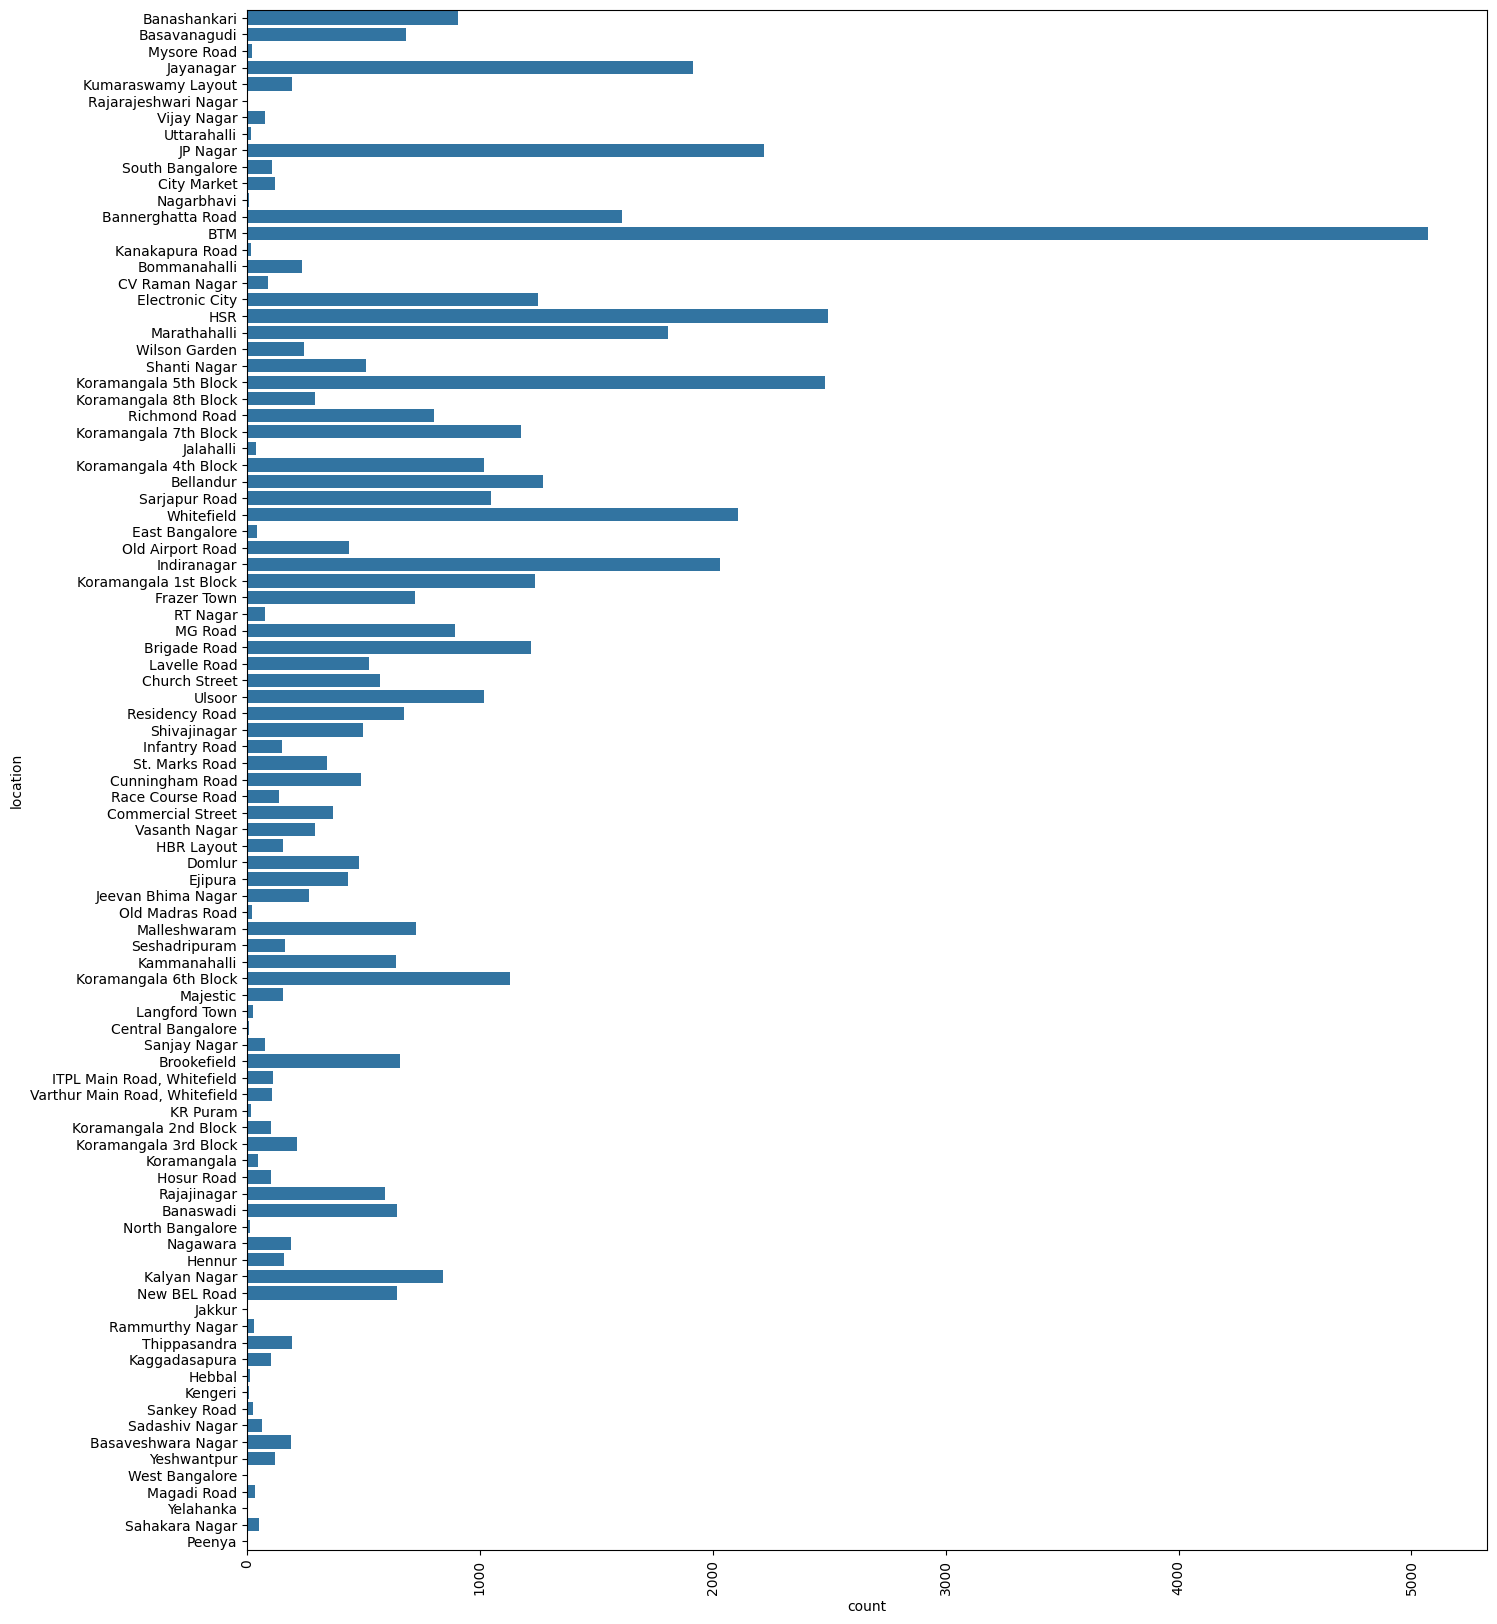

In [13]:
#Ahora vamos a visualizar el número de restaurantes por cada localización
plt.figure(figsize = (16,20))
ax = sns.countplot(df["location"])
plt.xticks(rotation = 90)
plt.show()

In [14]:
#Ahora vamos a ver el número de restaurantes que permiten y no permiten pedidos online.
#También vamos a ver los que permiten reservar mesa.

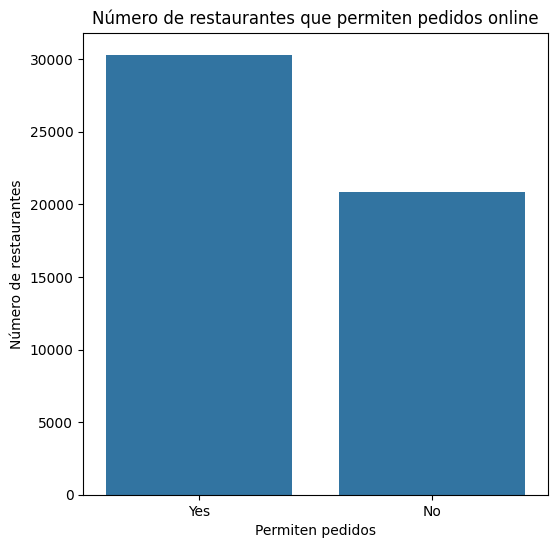

In [15]:
#Visualizamos la cantidad que permiten online order a traves de countplot
plt.figure(figsize=(6, 6))
ax = sns.countplot(x="online_order", data=df)
plt.title('Número de restaurantes que permiten pedidos online')
plt.xlabel('Permiten pedidos')
plt.ylabel('Número de restaurantes')
plt.show()

In [16]:
df["online_order"].value_counts()

,count
online_order,
Yes,30311
No,20837


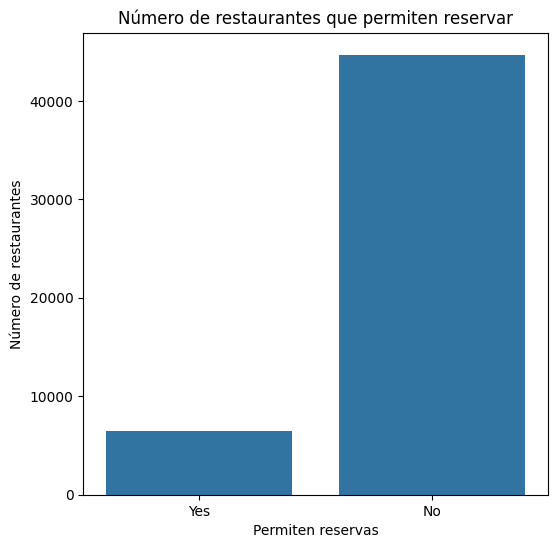

In [17]:
#Visualizamos los que permiten reservar mesa
plt.figure(figsize=(6, 6))
ax = sns.countplot(x="book_table", data=df)
plt.title('Número de restaurantes que permiten reservar')
plt.xlabel('Permiten reservas')
plt.ylabel('Número de restaurantes')
plt.show()

In [18]:
 df['book_table'].value_counts()

,count
book_table,
No,44699
Yes,6449


In [19]:
#Ahora vamos a visualizar cual es la distribución de la valoración de los usuarios en función de si el restaurante permite o no pedidos online
#Para ello vamos primero a cambiar el formato de nuestra columna rate
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if isinstance(x, str) and '/' in x else x)

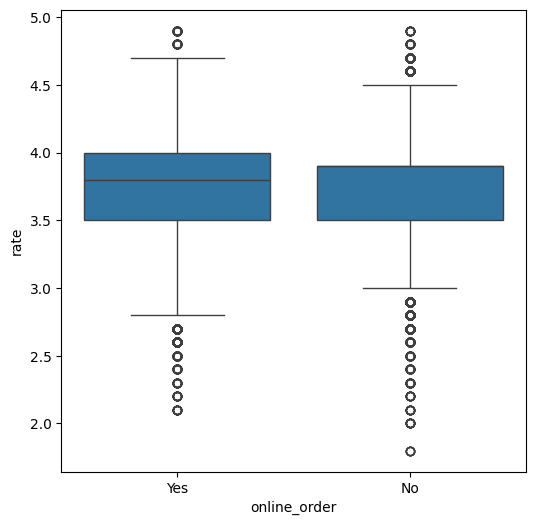

In [20]:
plt.figure(figsize = (6,6))
sns.boxplot(data = df, x = "online_order",y = "rate")
plt.show()

In [21]:
#Vamos a ver también mediante visualización, cual es la distribución de la valoración de los usuarios en función de si permiten reservas

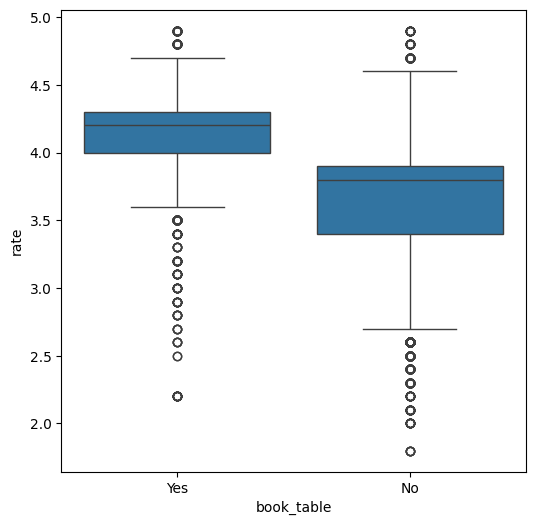

In [22]:
plt.figure(figsize = (6,6))
sns.boxplot(data = df, x = "book_table",y = "rate")
plt.show()

In [23]:
#Visto esto podemos decir que la variable book_table debería ser más determinante ya que entre sus dos clases, observando la variable rate, hay mayor diferencia entre sus distribuciones.

In [24]:
#Ahora vamos a realizar transformaciones para después crear un modelo de regresión capaz de predecir la valoración.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51148 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51148 non-null  object 
 1   online_order  51148 non-null  object 
 2   book_table    51148 non-null  object 
 3   rate          51148 non-null  float64
 4   votes         51148 non-null  int64  
 5   location      51148 non-null  object 
 6   rest_type     51148 non-null  object 
 7   cuisines      51148 non-null  object 
 8   Cost2plate    51148 non-null  float64
 9   Type          51148 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [26]:
#Vamos a transformar nuestras variables book_table y online_order para que Yes sea 1 y No sea 0
df['online_order'] = df['online_order'].replace({'Yes': 1, 'No': 0}).astype(int)
df['book_table'] = df['book_table'].replace({'Yes': 1, 'No': 0}).astype(int)

<ipython-input-26-972fde83ac10>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['online_order'] = df['online_order'].replace({'Yes': 1, 'No': 0}).astype(int)
<ipython-input-26-972fde83ac10>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['book_table'] = df['book_table'].replace({'Yes': 1, 'No': 0}).astype(int)


In [27]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [28]:
#Ahora vamos a analizar un poquito el resto de variables para ver cual es la mejor tranformación para nuestro modelo
df['rest_type'].value_counts()

,count
rest_type,
Quick Bites,19046
Casual Dining,10273
Cafe,3687
Delivery,2578
Dessert Parlor,2245
...,...
"Dessert Parlor, Kiosk",2
"Dessert Parlor, Food Court",2
Pop Up,2


In [29]:
#Vemos que hay mucha diferencia entre las más representadas y las menos. Así que lo más optimo en este caso puede ser agrupar las que están por debajo de 1000
rest_type = df["rest_type"].value_counts(ascending = False)
rest_less_than_1000 = rest_type[rest_type<1000]
rest_less_than_1000

,count
rest_type,
Beverage Shop,865
Bar,686
Food Court,619
Sweet Shop,468
"Bar, Casual Dining",415
...,...
"Dessert Parlor, Kiosk",2
"Dessert Parlor, Food Court",2
Pop Up,2


In [30]:
def rest_type(data):
    if data in rest_less_than_1000:
        return "Other"
    else:
        return data

In [31]:
df["rest_type"] = df["rest_type"].apply(rest_type)

In [32]:
#Vemos como queda nuestra transformación
df["rest_type"].value_counts()

,count
rest_type,
Quick Bites,19046
Casual Dining,10273
Other,9028
Cafe,3687
Delivery,2578
Dessert Parlor,2245
"Takeaway, Delivery",2014
Bakery,1141
"Casual Dining, Bar",1136


In [33]:
#Vamos ahora con la variable Location
df['location'].value_counts()

,count
location,
BTM,5071
HSR,2496
Koramangala 5th Block,2481
JP Nagar,2219
Whitefield,2109
...,...
West Bangalore,6
Yelahanka,5
Jakkur,3


In [34]:
#Vemos que pasa lo mismo, hay muchas localizaciones, si hicieramos directamente la tranformación One hot, nuestro dataframe se ampliaría mucho lo que podría darnos problemas por ejemplo de dimensionalidad.
#Vamos a agruparlo en este caso en aquellas por debajo de 400, para que tampoco sea éste el grupo mayoritario.

In [35]:
location = df["location"].value_counts()
location_less_than_400 = location[location<400]
location_less_than_400

,count
location,
Commercial Street,370
St. Marks Road,343
Koramangala 8th Block,294
Vasanth Nagar,293
Jeevan Bhima Nagar,268
Wilson Garden,246
Bommanahalli,236
Koramangala 3rd Block,216
Thippasandra,191


In [36]:
def location(data):
    if data in location_less_than_400:
        return "Other"
    else:
        return data

In [37]:
df["location"] = df["location"].apply(location)

In [38]:
df["location"].value_counts()

,count
location,
Other,5675
BTM,5071
HSR,2496
Koramangala 5th Block,2481
JP Nagar,2219
Whitefield,2109
Indiranagar,2033
Jayanagar,1916
Marathahalli,1808


In [39]:
#Vamos ahora con la variable Cuisines, en este caso agrupamos las que están por debajo de 1000 como rest_type ya que hay muchas clases
cuisines = df["cuisines"].value_counts(ascending = False)
cuisines_less_than_1000 = cuisines[cuisines<1000]
cuisines_less_than_1000

,count
cuisines,
Biryani,906
"Bakery, Desserts",899
Fast Food,798
Desserts,760
Cafe,726
...,...
"Bengali, Oriya, South Indian",1
"Oriya, North Indian",1
"Healthy Food, Salad, Mediterranean",1


In [40]:
def cuisines(data):
    if data in cuisines_less_than_1000:
        return "Other"
    else:
        return data

In [41]:
df["cuisines"] = df["cuisines"].apply(cuisines)

In [42]:
df["cuisines"].value_counts()

,count
cuisines,
Other,44113
North Indian,2858
"North Indian, Chinese",2355
South Indian,1822


In [43]:
#Ahora que hemos tratado nuestras variables, vamos a aplicar un modelo de Regresión para predecir la valoración.
#Trataremos también de mejorar los resultados aplicando otros modelos.
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plate,Type
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,Other,800.0,Buffet
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,Other,800.0,Buffet
2,San Churro Cafe,1,0,3.8,918,Banashankari,Other,Other,800.0,Buffet
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Other,300.0,Buffet
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,Other,600.0,Buffet


In [44]:
#Vamos a aplicar GridSearch sobre un árbol de regresión
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [45]:
#Eliminamos rate que es nuestro objetivo a predecir y name que es el identificador y no es muy relevante en este caso
#Hacemos getdummies para convertir las variables categoricas
df_pred = df.drop(["rate", "name"], axis = 1)
df_pred = pd.get_dummies(df_pred, drop_first=True)

In [46]:
#Creamos las variables X e Y para el entrenamiento del modelo, X contiene todas las variables que hemos dejado y convertido en df_pred, e Y contiene nuestra target.
X = df_pred
Y = df['rate']

In [47]:
#Dividimos nuestros datos en conjunto de entrenamiento y prueba con train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [48]:
#Estandarizamos nuestros datos, esto lo hacemos para llevar todas las características a la misma escala.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [49]:
#Definimos el modelo
regressor = DecisionTreeRegressor(random_state = 0)

In [50]:
#Definimos nuestros hiperparámetros
parameters = {'min_samples_split': [10, 20, 40, 60, 80, 100],
                  'min_samples_leaf': [5, 10, 15, 20],
                  'max_depth': [4, 6, 8, 10]
                 }

In [51]:
#Definimos nuestro GridSearch
grid_tree = GridSearchCV(estimator=regressor, param_grid = parameters)

In [52]:
#Entrenamos
grid_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [5, 10, 15, 20],
                         'min_samples_split': [10, 20, 40, 60, 80, 100]})

In [53]:
#Obtenemos los mejores parametros
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_tree.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_tree.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_tree.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=0)

 The best score across ALL searched params:
 0.5409680957075274

 The best parameters across ALL searched params:
 {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error

In [55]:
#Vamos a evaluar ahora el rendimiento de nuestro modelo utilizando el error cuadrático medio (RMSE)
#Evaluación del modelo para el conjunto de entrenamiento
y_train_predict = grid_tree.best_estimator_.predict(X_train)
rmse = root_mean_squared_error(y_train, y_train_predict)

print("El rendimiento del modelo para el conjunto de entrenamiento")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print("\n")

El rendimiento del modelo para el conjunto de entrenamiento
--------------------------------------
RMSE es 0.26483710682872796




In [56]:
#Evaluación del modelo para el conjunto de prueba
y_test_predict = grid_tree.best_estimator_.predict(X_test)
rmse = root_mean_squared_error(y_test, y_test_predict)

print("El rendimiento del modelo para el conjunto de prueba")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))

El rendimiento del modelo para el conjunto de prueba
--------------------------------------
RMSE es 0.26863130209947556


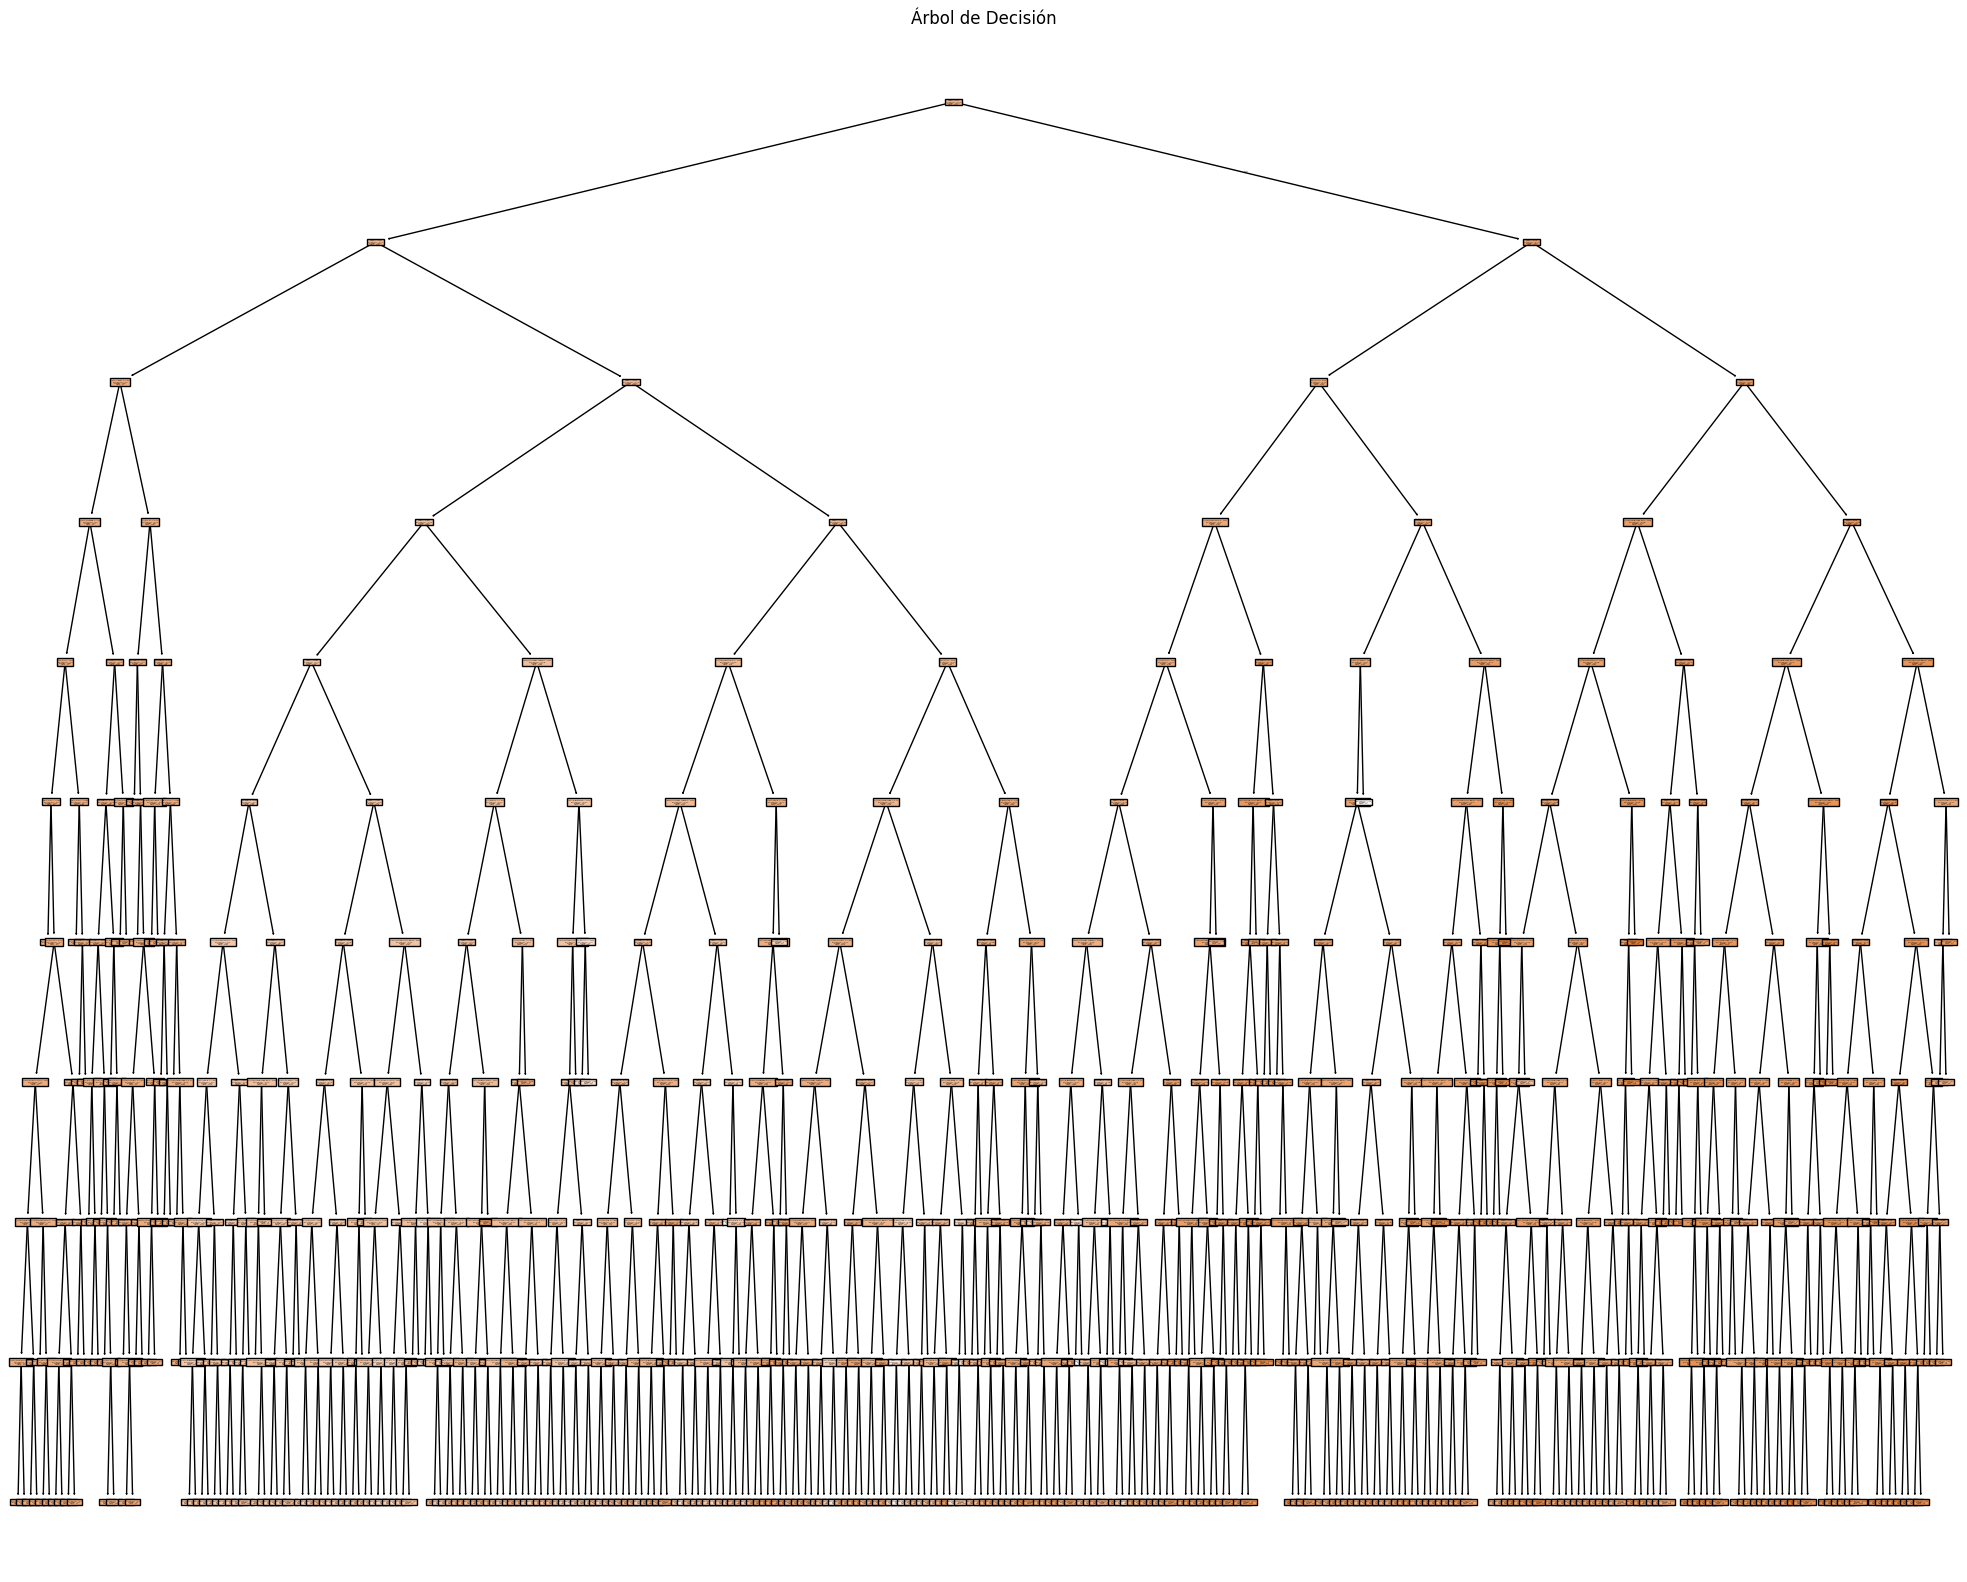

In [57]:
#Ahora vamos a visualizar nuestro árbol de decisión con los mejores parámetros que nos ha sacado nuestro GridSearch.
from sklearn import tree
fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(grid_tree.best_estimator_,
                   feature_names=X.columns,
                   filled=True)

plt.title("Árbol de Decisión")
plt.show()

In [58]:
#Debido a la profundidad del árbol no podemos leer con claridad las variables, existen diferentes técnicas para su visualización:

#Podríamos por ejemplo limitar la profundidad del árbol.
#Podríamos tamnbién reducir el tamaño de los nodos.
#Ajustar el tamaño de la figura.
#Mostrar solo las características más importantes.
#Exportar a un archivo PDF o PNG para poder agrandarlo y visualizar con alta resolución, por ejemplo podemos usar Graphviz para mejorar la visualización o guardarlo en pdf.

In [63]:
#Vamos a visualizar nuestro árbol en este caso con Graphviz y guardarlo en un PDF.
#El archivo Source.gv.pdf que se genera con el comando graph.view() es un archivo PDF que se guarda en nuestro sistema.
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(grid_tree.best_estimator_, out_file=None,
                           feature_names=X.columns, filled=True)
graph = graphviz.Source(dot_data)
graph.view()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.7 MB/s eta 0:00:00


'Source.gv.pdf'

In [64]:
#Ahora una vez analizado nuestro árbol por un lado vamos a aplicar la selección de variables y un modelo de regresión lineal múltiple.
#Creamos un dataframe a partir de los datos de entrenamiento y prueba
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [65]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
!pip install mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from tqdm import tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.7 MB/s eta 0:00:00


In [66]:
#Vamos a hacer la selección de variables utilizando Sequential Feature Selector (SFS) con el método Backward Selection.
#Nos enfocamos en la eliminación de características irrelevantes, comenzando con todas y quitanbdo las que son menos útiles.
dataset_seleccion = pd.DataFrame()
for i in tqdm(range(1, len(X_train_df.columns))):
    sbs = SFS(LinearRegression(),k_features=i,forward=False,floating=False)
    sbs.fit(np.array(X_train), y_train)
    sbs.k_feature_names_
    regression = LinearRegression()
    regression.fit(X_train_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]], y_train)
    y_pred = regression.predict(X_test_df[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]])
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    dataset_seleccion = pd.concat([dataset_seleccion,pd.DataFrame({"variables":[[X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]],"rmse": rmse})],ignore_index = True)

  3%|▎         | 2/59 [20:52<9:54:52, 626.18s/it]


TypeError: 'NoneType' object is not iterable

In [67]:
#COMO EL BLOQUE DE CÓDIGO ANTERIOR PRUEBA TODAS LAS POSIBLES COMBINACIONES DE CARACTERÍSTICAS, TARDARÍA SEGÚN NOS MUESTRA EL PROGRAMA UNAS 9 HORAS EN EJECUTARSE Y DARNOS LOS RESULTADOS.
#PODEMOS REDUCIR EL RANGO DEL BUCLE, LIMITANDOLO PARA PROBAR UN SUBCONJUNTO MÁS PEQUEÑO
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from tqdm import tqdm

#DataFrame para guardar resultados
dataset_seleccion = pd.DataFrame()

#Reducimos el rango de características a evaluar
min_features = 5
max_features = min(20, len(X_train_df.columns))  #Limitamos a 20 características como máximo

for i in tqdm(range(min_features, max_features)):
    #Sequential Backward Selection con paralelización
    sbs = SFS(LinearRegression(),
              k_features=i,
              forward=False,
              floating=False,
              n_jobs=-1)  #Usar todos los núcleos disponibles

    #Ajustar SFS al conjunto de entrenamiento
    sbs.fit(np.array(X_train), y_train)

    #Obtener las características seleccionadas
    selected_features = [X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]

    #Entrenar un modelo de regresión lineal con las características seleccionadas
    regression = LinearRegression()
    regression.fit(X_train_df[selected_features], y_train)

    #Predecir en el conjunto de prueba
    y_pred = regression.predict(X_test_df[selected_features])

    #Calculamos RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    #Guardamos los resultados en dataset_seleccion
    dataset_seleccion = pd.concat([dataset_seleccion,
                                   pd.DataFrame({"variables": [selected_features], "rmse": [rmse]})],
                                   ignore_index=True)

100%|██████████| 15/15 [19:32<00:00, 78.18s/it]


In [68]:
dataset_seleccion.sort_values(by = "rmse", ascending = True, ignore_index = True)

,variables,rmse
0,"[book_table, votes, Cost2plate, location_Banne...",0.348410
1,"[book_table, votes, Cost2plate, location_Banne...",0.348741
2,"[book_table, votes, Cost2plate, location_Banne...",0.348863
3,"[book_table, votes, Cost2plate, location_Banne...",0.349150
4,"[book_table, votes, Cost2plate, location_Banne...",0.349463
5,"[book_table, votes, Cost2plate, location_Banne...",0.349562
6,"[book_table, votes, Cost2plate, location_Banne...",0.349811
7,"[book_table, votes, Cost2plate, location_Banne...",0.350161
8,"[book_table, votes, Cost2plate, location_Banne...",0.350520
9,"[book_table, votes, Cost2plate, location_Banne...",0.350775


In [69]:
X = df_pred[dataset_seleccion.sort_values(by = "rmse", ascending = True, ignore_index = True)["variables"][0]]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [71]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [72]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = regression.predict(X_test)

In [74]:
rmse = mean_squared_error(y_test, y_pred, squared = False)

In [75]:
rmse

0.34841029489576814

In [76]:
#VISTO Y ANALIZADO TODO LO ANTERIOR PODEMOS DECIR BASÁNDONOS EN LOS RESULTADOS OBTENIDOS, QUE NOS QUEDARÍAMOS CON EL ÁRBOL DE REGRESIÓN YA QUE NOS DEVUELVE UN RMSE DE 0,26 FRENTE AL 0,34 DE LA REGRESIÓN LINEAL MÚLTIPLE.